## **06 - Boosting**

## **1. Importaciones**

In [375]:
import pandas as pd
import numpy as np
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
import shap
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *
from imblearn.metrics import specificity_score
from sklearn.ensemble import GradientBoostingClassifier





## **2. Subir Dataset**

In [376]:
from google.colab import files
uploaded = files.upload()

Saving internal-link.csv to internal-link (7).csv


## **3.Abrir Dataset**

In [377]:
df = pd.read_csv('internal-link.csv')
pd.set_option('display.max_columns', None)
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


## **4. Entender el Dataset**

In [378]:
for column in df.columns:
    print(column, df[column].nunique())
for column in df.columns:
    print(column, df[column].unique())

Pregnancies 17
Glucose 136
BloodPressure 47
SkinThickness 51
Insulin 186
BMI 248
DiabetesPedigreeFunction 517
Age 52
Outcome 2
Pregnancies [ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
Glucose [148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]
BloodPressure [ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]
SkinThickness [35 29  0 23 32 45 19 47 38

## **5. Descripción de las Variables**

In [379]:
for col in df.columns:
    print(f"\nColumna: {col}")

    # Conteos absolutos
    conteos = df[col].value_counts(dropna=False)

    # Porcentajes
    porcentajes = df[col].value_counts(normalize=True, dropna=False) * 100

    # Combinar en un solo DataFrame
    resumen = pd.DataFrame({
        'Conteo': conteos,
        'Porcentaje (%)': porcentajes.round(2)
    })

    print(resumen)


Columna: Pregnancies
             Conteo  Porcentaje (%)
Pregnancies                        
1               135           17.58
0               111           14.45
2               103           13.41
3                75            9.77
4                68            8.85
5                57            7.42
6                50            6.51
7                45            5.86
8                38            4.95
9                28            3.65
10               24            3.12
11               11            1.43
13               10            1.30
12                9            1.17
14                2            0.26
17                1            0.13
15                1            0.13

Columna: Glucose
         Conteo  Porcentaje (%)
Glucose                        
99           17            2.21
100          17            2.21
111          14            1.82
125          14            1.82
129          14            1.82
...         ...             ...
56            1     

## **6. Cribado Manual** Se hizo en el Proyecto DecissionTree. No se elimino nada.

## **7. Analizar Valores sin sentido** Glucosa hay valores de 30 a 600. Presión Arterial de 30 a 200. SkinThickness hay valores de cero a 99. Insulin de 0 a 300. BMI mayor de 10 y de DiabetesPedigreeFunction de 0 a 2.5

In [380]:
df_clean = df.copy()
df_clean.loc[(df_clean["Glucose"] < 30) | (df_clean["Glucose"] > 600), "Glucose"] = np.nan
df_clean.loc[(df_clean["BloodPressure"] < 30) | (df_clean["BloodPressure"] > 200), "BloodPressure"] = np.nan
df_clean.loc[(df_clean["SkinThickness"] <= 0) | (df_clean["SkinThickness"] > 99), "SkinThickness"] = np.nan
df_clean.loc[(df_clean["Insulin"] <= 0) | (df_clean["Insulin"] > 300), "Insulin"] = np.nan
df_clean.loc[df_clean["BMI"] < 10, "BMI"] = np.nan
df_clean.loc[(df_clean["DiabetesPedigreeFunction"] < 0) | (df_clean["DiabetesPedigreeFunction"] > 2.5), "DiabetesPedigreeFunction"] = np.nan

df_clean.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,NaN,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


## **8. Valores faltantes por columnas** Tiene que ser mayor a 40 % Para poder eliminarlas. Eliminamos la Insulina.

In [381]:
df_clean.shape

(768, 9)

In [382]:
faltantes = df_clean.isna().mean()*100
faltantes[faltantes>0]

,0
Glucose,0.651042
BloodPressure,4.687500
SkinThickness,29.557292
Insulin,53.515625
BMI,1.432292


In [383]:
df_clean = df_clean.drop(columns=["Insulin"])

## **9. Valores Faltantes por Filas.** No eliminamos ninguna

In [384]:
df_clean.isnull().any(axis=1).sum()

np.int64(237)

In [385]:
n = 2
df_clean[df_clean.isnull().sum(axis=1) == n]

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115.0,NaN,NaN,35.3,0.134,29,0
9,8,125.0,96.0,NaN,NaN,0.232,54,1
15,7,100.0,NaN,NaN,30.0,0.484,32,1
78,0,131.0,NaN,NaN,43.2,0.270,26,1
193,11,135.0,NaN,NaN,52.3,0.578,40,1
222,7,119.0,NaN,NaN,25.2,0.209,37,0
261,3,141.0,NaN,NaN,30.0,0.761,27,1
266,0,138.0,NaN,NaN,36.3,0.933,25,1
269,2,146.0,NaN,NaN,27.5,0.240,28,1
300,0,167.0,NaN,NaN,32.3,0.839,30,1


In [386]:
n = 3
df_clean[df_clean.isnull().sum(axis=1) == n]

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
49,7,105.0,NaN,NaN,NaN,0.305,24,0
60,2,84.0,NaN,NaN,NaN,0.304,21,0
81,2,74.0,NaN,NaN,NaN,0.102,22,0
426,0,94.0,NaN,NaN,NaN,0.256,25,0
494,3,80.0,NaN,NaN,NaN,0.174,22,0
522,6,114.0,NaN,NaN,NaN,0.189,26,0
706,10,115.0,NaN,NaN,NaN,0.261,30,1


<Axes: >

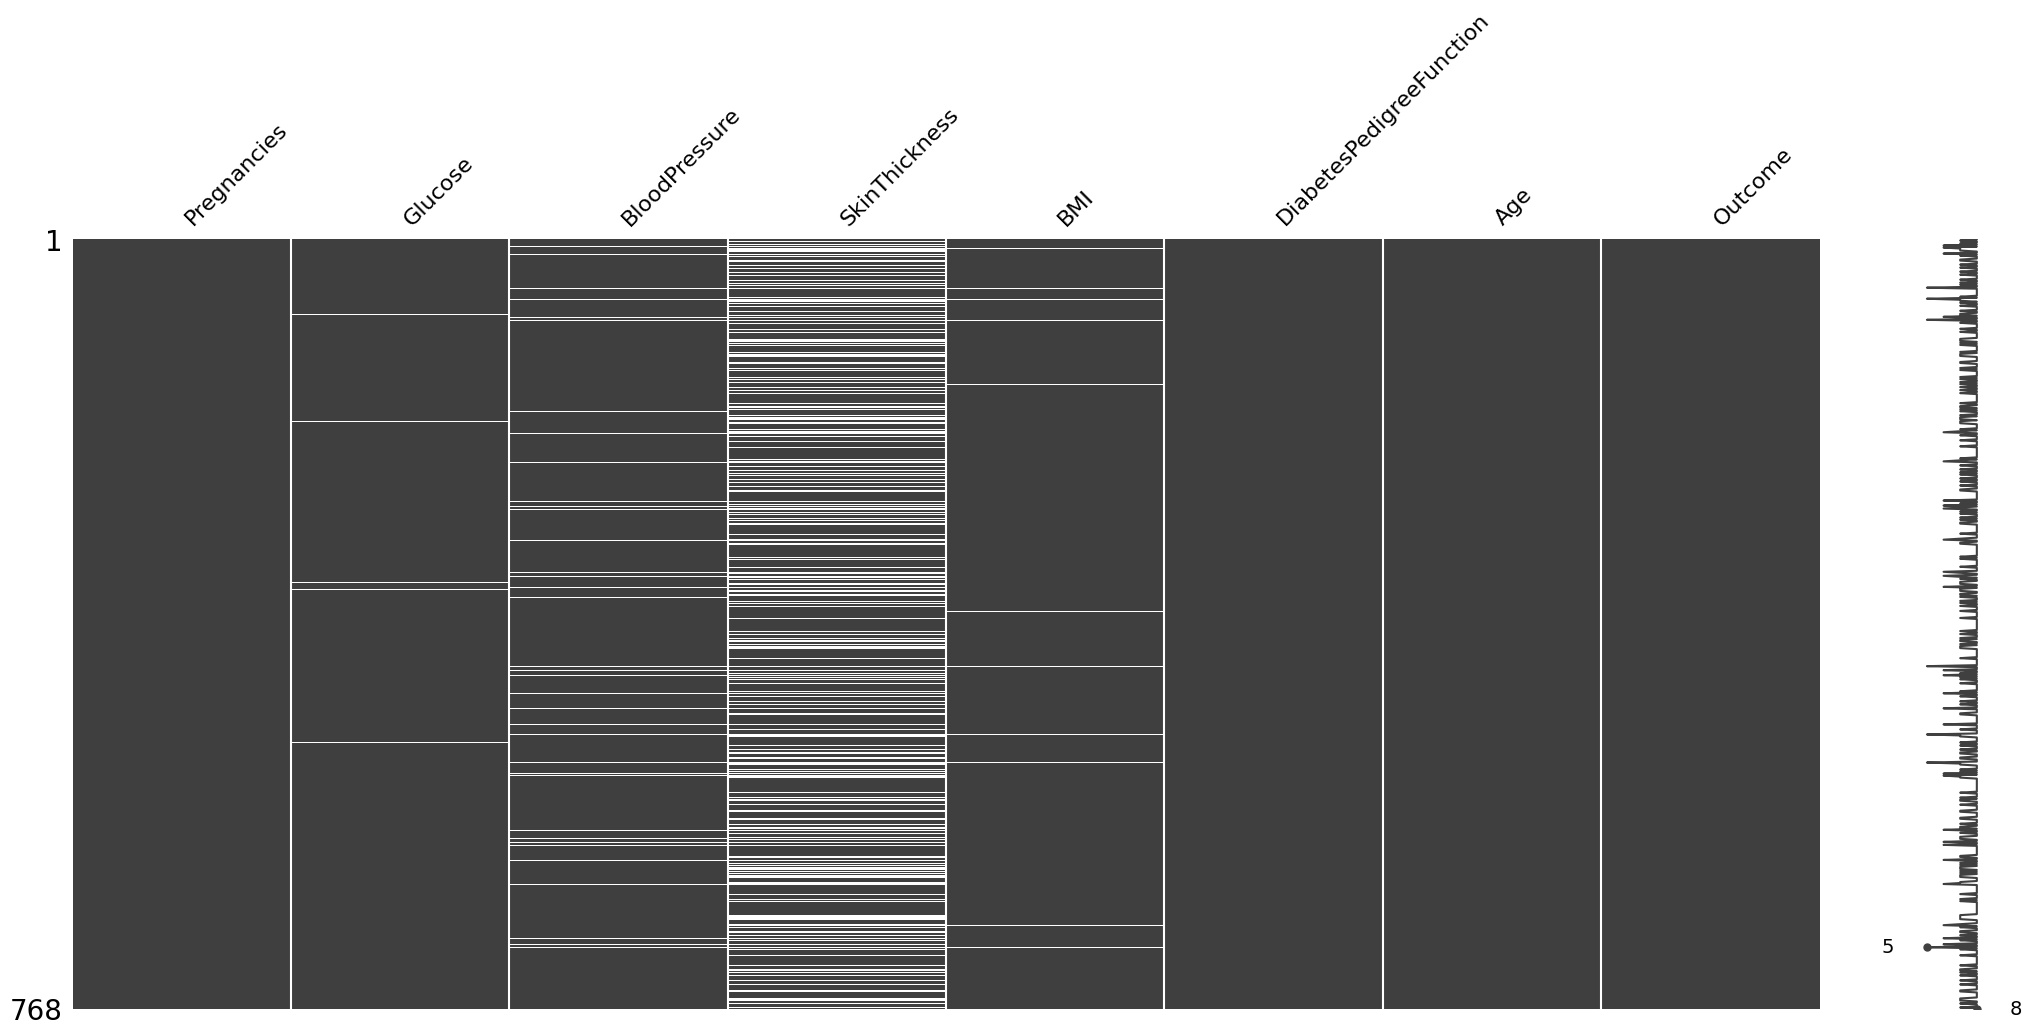

In [387]:
msno.matrix(df_clean)

## **10. Train Test-Split**

In [388]:
X = df_clean.drop('Outcome',axis=1)
y = df_clean['Outcome']

In [389]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **11.Imputar**

In [390]:
X_train[['Glucose',	'BloodPressure',	'SkinThickness',	'BMI']]

,Glucose,BloodPressure,SkinThickness,BMI
60,84.0,NaN,NaN,NaN
618,112.0,82.0,24.0,28.2
346,139.0,46.0,19.0,28.7
294,161.0,50.0,NaN,21.9
231,134.0,80.0,37.0,46.2
...,...,...,...,...
71,139.0,64.0,35.0,28.6
106,96.0,122.0,NaN,22.4
270,101.0,86.0,37.0,45.6
435,141.0,NaN,NaN,42.4


In [391]:
X_train['Glucose'].value_counts(normalize=True)*100

,proportion
Glucose,
99.0,2.627258
100.0,2.463054
125.0,2.134647
108.0,1.970443
129.0,1.970443
...,...
198.0,0.164204
178.0,0.164204
167.0,0.164204


In [392]:
X_train['SkinThickness'].value_counts(normalize=True)*100

,proportion
SkinThickness,
30.0,5.479452
32.0,5.251142
23.0,4.794521
27.0,3.881279
33.0,3.881279
19.0,3.881279
18.0,3.652968
39.0,3.652968
15.0,3.196347


In [393]:
X_train['BMI'].value_counts(normalize=True)*100

,proportion
BMI,
32.0,1.976936
31.6,1.812191
31.2,1.647446
30.1,1.482702
32.4,1.482702
...,...
49.6,0.164745
22.3,0.164745
33.5,0.164745


In [394]:
cols_imputar = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']
X_train_imp = X_train.copy()
imputer = KNNImputer(n_neighbors=5)  # puedes cambiar el número de vecinos
X_train_imp[cols_imputar] = imputer.fit_transform(X_train_imp[cols_imputar])

In [395]:
X_test_imp = X_test.copy()
X_test_imp[cols_imputar] = imputer.transform(X_test_imp[cols_imputar])

## **12. Chequear los OUTLIERS**

In [396]:
X_train_imp.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,614.0,3.742671,3.313264,0.000,1.0000,3.0000,6.00000,17.00
Glucose,614.0,121.892834,30.118997,44.000,100.0000,118.0000,139.00000,199.00
BloodPressure,614.0,72.269055,12.057201,30.000,64.0000,72.0000,80.00000,122.00
SkinThickness,614.0,28.320521,9.035767,8.000,21.4000,28.0000,34.75000,63.00
BMI,614.0,32.349642,6.942919,18.200,27.3000,32.0000,36.37500,67.10
DiabetesPedigreeFunction,614.0,0.469168,0.336847,0.078,0.2415,0.3725,0.61375,2.42
Age,614.0,32.907166,11.503437,21.000,24.0000,29.0000,40.00000,81.00


In [397]:
iso = IsolationForest(random_state=123)
df_num = X_train_imp.copy()
df_num['outlier_flag'] = iso.fit_predict(X_train_imp)

In [398]:
df_num['outlier_flag'].value_counts()

,count
outlier_flag,
1,526
-1,88


## **13.  Selección de Características**

\Método 1: Feature importance de RF

In [399]:
model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
model.fit(X_train_imp, y_train)

GradientBoostingClassifier(random_state=42)

In [400]:
# Importancia de características
importances = model.feature_importances_ / model.feature_importances_.sum() * 100

# Convertir a DataFrame
df_dt_imp = pd.DataFrame({
    'feature': X_train_imp.columns,
    'dt_importance': importances
}).sort_values(by='dt_importance', ascending=False)

# Calculamos la importancia acumulada
df_dt_imp['dt_importance_acum'] = df_dt_imp['dt_importance'].cumsum()

In [401]:
df_dt_imp

,feature,dt_importance,dt_importance_acum
1,Glucose,42.072847,42.072847
4,BMI,18.570713,60.643560
6,Age,16.369550,77.013110
5,DiabetesPedigreeFunction,11.888785,88.901895
3,SkinThickness,5.029031,93.930925
2,BloodPressure,3.238205,97.169130
0,Pregnancies,2.830870,100.000000


Método 2: Permutation/Shuffle importance

In [402]:
# Para esta técnica y la de shap se necesita conjunto de validación
X_train1, X_val, y_train1, y_val = train_test_split(
    X_train_imp, y_train, test_size=0.2, random_state=42
)

# Ajustar modelo Decision Tree (regresión)
model_dt = GradientBoostingClassifier(random_state=42)
model_dt.fit(X_train1, y_train1)

GradientBoostingClassifier(random_state=42)

In [403]:
# Realizamos 10 permutaciones por cada característica
perm = permutation_importance(
    model_dt,
    X_val,
    y_val,
    n_repeats=10,
    random_state=42,
    n_jobs=-1,
    scoring='f1'
)

In [404]:
df_perm_imp = pd.DataFrame({
    'feature': X_train_imp.columns,
    'perm_imp': perm.importances_mean * 100
}).sort_values('perm_imp', ascending=False)

df_perm_imp

,feature,perm_imp
1,Glucose,16.871042
4,BMI,7.074620
6,Age,6.243094
5,DiabetesPedigreeFunction,3.449943
0,Pregnancies,1.323120
2,BloodPressure,1.215903
3,SkinThickness,-0.441068


Método 3: SHAP


In [405]:
# Ajustamos el modelo
model_dt = GradientBoostingClassifier(random_state=42)
model_dt.fit(X_train1, y_train1)

explainer = shap.TreeExplainer(model_dt)
shap_vals = explainer.shap_values(X_val)

In [406]:
imp_shap = np.abs(shap_vals).mean(axis=0)
imp_shap_pct = imp_shap / imp_shap.sum() * 100

df_shap_imp = pd.DataFrame({
    "feature": X_val.columns,
    "shap_imp": imp_shap_pct
}).sort_values("shap_imp", ascending=False)

In [407]:
# --- SHAP Summary Bar Plot ---
df_shap_imp

,feature,shap_imp
1,Glucose,28.007927
6,Age,21.913247
4,BMI,15.153009
5,DiabetesPedigreeFunction,15.127866
3,SkinThickness,10.424877
2,BloodPressure,5.638128
0,Pregnancies,3.734945


Unión 3 métodos

In [408]:
df_importances = (
    df_dt_imp
    .merge(df_perm_imp, on='feature', how='outer')
    .merge(df_shap_imp, on='feature', how='outer')
).sort_values('dt_importance', ascending=False)

df_importances

,feature,dt_importance,dt_importance_acum,perm_imp,shap_imp
4,Glucose,42.072847,42.072847,16.871042,28.007927
1,BMI,18.570713,60.643560,7.074620,15.153009
0,Age,16.369550,77.013110,6.243094,21.913247
3,DiabetesPedigreeFunction,11.888785,88.901895,3.449943,15.127866
6,SkinThickness,5.029031,93.930925,-0.441068,10.424877
2,BloodPressure,3.238205,97.169130,1.215903,5.638128
5,Pregnancies,2.830870,100.000000,1.323120,3.734945


In [409]:
df_filt = df_importances[
    (df_importances['dt_importance'] >= 1) &
    (df_importances['perm_imp'] >= 1) &
    (df_importances['shap_imp'] >= 1)
]

df_filt

,feature,dt_importance,dt_importance_acum,perm_imp,shap_imp
4,Glucose,42.072847,42.072847,16.871042,28.007927
1,BMI,18.570713,60.643560,7.074620,15.153009
0,Age,16.369550,77.013110,6.243094,21.913247
3,DiabetesPedigreeFunction,11.888785,88.901895,3.449943,15.127866
2,BloodPressure,3.238205,97.169130,1.215903,5.638128
5,Pregnancies,2.830870,100.000000,1.323120,3.734945


##**14. Medir Correlación de Variables**

In [410]:
features = df_filt['feature']
features

,feature
4,Glucose
1,BMI
0,Age
3,DiabetesPedigreeFunction
2,BloodPressure
5,Pregnancies


In [411]:
from statsmodels.tools.tools import add_constant

X_vif = add_constant(X_train_imp[features])

vif = pd.Series([variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])],index=X_vif.columns)
vif = vif.drop("const")
vif

,0
Glucose,1.167800
BMI,1.169433
Age,1.634443
DiabetesPedigreeFunction,1.041065
BloodPressure,1.234793
Pregnancies,1.443610


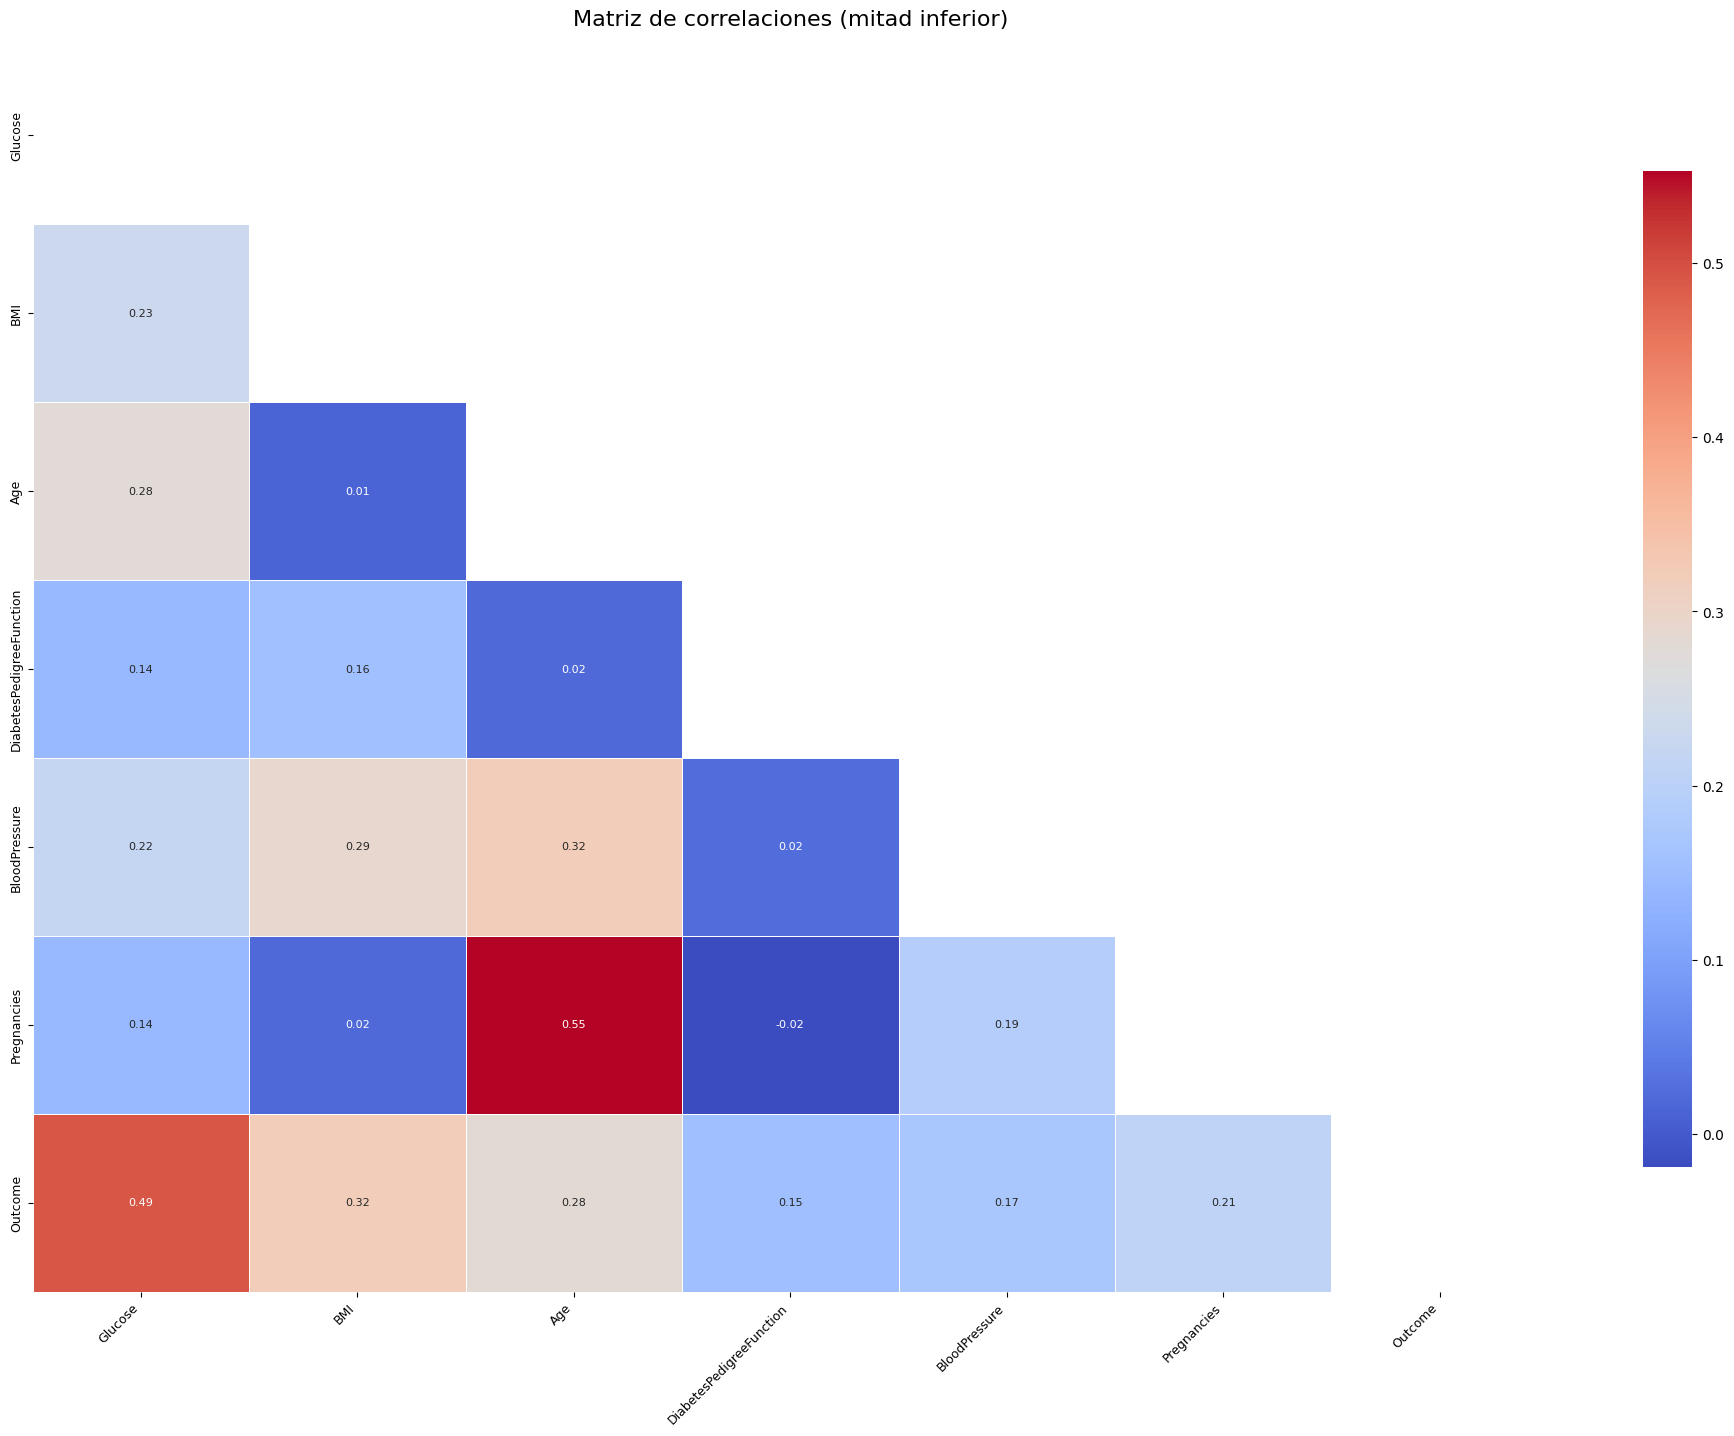

In [412]:
X_copy = X_train_imp[features].copy()
X_copy['Outcome'] = y_train
corr = X_copy.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(20, 15))
sns.heatmap(
    corr, mask=mask, cmap='coolwarm',
    annot=True, fmt=".2f", linewidths=.5,
    cbar_kws={"shrink": .8},
    annot_kws={"size": 8}
)
plt.title("Matriz de correlaciones (mitad inferior)", fontsize=16, pad=15)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout(pad=3.0)
plt.show()

## **15.Cross Validation**

In [413]:
# Versión 1: Realizar cross_validation con todas las características que son candidatas
cv_results_dt = cross_val_score(
    GradientBoostingClassifier(random_state=42),
    X_train_imp[features],
    y_train,
    cv=3,
    scoring='f1'
)

print("Score por fold:", cv_results_dt)
print("Score medio:", cv_results_dt.mean())

Score por fold: [0.65671642 0.68055556 0.57364341]
Score medio: 0.6369717947729056


In [414]:
# Versión 2: Realizar cross_validation con  las características que son candidatas sin las correlacionadas
cv_results2 = cross_val_score(GradientBoostingClassifier(random_state=42), X_train_imp[features].drop(['Pregnancies'],axis=1), y_train, cv=3, scoring='f1')

In [415]:
print("Score por fold:", cv_results2)
print("Score medio:", cv_results2.mean())

Score por fold: [0.67175573 0.63448276 0.6031746 ]
Score medio: 0.6364710289953776


## **16.Modelado y Entrenamiento**

In [416]:
class CustomBoosting:

  def __init__(self, n_estimators=100, learning_rate=0.01, max_depth=10, min_samples_leaf=10, max_features=1.0, random_state=42):
    # Inicializa el modelo con hiperparámetros personalizables
    self.n_estimators = n_estimators  # Número de estimadores en el ensamble
    self.learning_rate = learning_rate  # Tasa de aprendizaje
    self.max_depth = max_depth  # Profundidad máxima de los árboles de decisión
    self.min_samples_leaf = min_samples_leaf  # Número mínimo de muestras por hoja
    self.max_features = max_features  # Proporción máxima de características a considerar en cada división
    self.random_state = random_state  # Semilla aleatoria para reproducibilidad
    self.estimadores = [] # Almacena los estimadores del ensamble

  def muestreo(self, X, y, pesos):
      # Realiza un muestreo ponderado de las instancias de entrenamiento
      np.random.seed(self.random_state)
      indices = np.random.choice(len(X), len(X), p=pesos)  # Selecciona posiciones del conjunto de datos con reemplazo
      return X[indices], y[indices]

  def get_error(self, y, y_pred, pesos):
      # Calcula el error ponderado, indicando cuántas instancias se clasificaron incorrectamente en relación a sus pesos
      instancias_erroneas = (y_pred != y)  # Identifica las instancias mal clasificadas (True/False)
      pesos_instancias_erroneas = pesos[instancias_erroneas]  # Obtiene los pesos de las instancias erróneas
      suma_peso_error = np.sum(pesos_instancias_erroneas)  # Suma los pesos de las instancias erróneas
      error_ponderado = suma_peso_error / np.sum(pesos)  # Proporciona un valor entre 0 y 1
      return instancias_erroneas, error_ponderado

  def get_estimator_importance(self, error_ponderado):
      # Calcula la importancia del estimador en el ensamble
      ratio_acierto_error = (1 - error_ponderado) / error_ponderado  # Mide el grado de acierto del estimador (mayor valor indica más aciertos que fallos)
      ratio_log = np.log(ratio_acierto_error)  # Aumenta el impacto de los estimadores que funcionan mejor y reduce el de los que funcionan peor
      # Ajustando su influencia en función de su rendimiento y asegurando un equilibrio entre el aprendizaje eficaz y la prevención del overfitting
      estimador_imp = self.learning_rate * ratio_log  # Limita el impacto de cada estimador en la predicción final (para evitar el overfitting)
      return estimador_imp

  def update_weights(self, estimador_imp, instancias_erroneas, pesos):
      # Actualiza los pesos de las instancias para dar más importancia a las instancias mal clasificadas
      # incrementar de forma más específica los pesos de las instancias que fueron mal clasificadas,
      # mientras que disminuye los de las que fueron correctamente clasificadas, ajustando así de manera más efectiva la atención del modelo hacia las instancias que más necesita aprender.
      actualizacion_pesos = np.where(instancias_erroneas, np.exp(estimador_imp), np.exp(-estimador_imp))
      pesos = pesos * actualizacion_pesos  # Aplica la actualización a los pesos
      pesos = pesos / np.sum(pesos)  # Normaliza los pesos para que sumen 1, creando una distribución de probabilidad válida
      return pesos

  def fit(self, X, y):
    # Inicializar los pesos de las instancias de forma que todas tengan la misma probabilidad de salir
    pesos = np.ones(len(X)) / len(X)
    # Para cada árbol
    for _ in range(self.n_estimators):
      # Realizamos el muestreo de las instancias para entrenar el árbol
      X_sampled, y_sampled = self.muestreo(X, y, pesos)
      # Realizamos el ajuste del árbol a ese dataset muestreado
      estimador = DecisionTreeClassifier(max_depth=self.max_depth, min_samples_leaf=self.min_samples_leaf, max_features=self.max_features).fit(X_sampled, y_sampled)
      # Aplico el árbol entrenado sobre mi X
      y_pred = estimador.predict(X)
      # Obtenemos el error cometido
      instancias_erroneas, error_ponderado = self.get_error(y, y_pred, pesos)
      # Obtener la importancia de ese árbol
      estimador_imp = self.get_estimator_importance(error_ponderado)
      # Almacena el estimador y su importancia asociada
      self.estimadores.append((estimador, estimador_imp))
      # Actualizar los pesos
      pesos = self.update_weights(estimador_imp, instancias_erroneas, pesos)

  def predict(self, X):
    # Inicializa un vector de predicciones vacío con el mismo número de instancias a predecir
    final_predictions = np.zeros(X.shape[0])
    # Para cada estimador en el ensamble
    for estimador, estimador_imp in self.estimadores:
        # Realiza predicciones con las instancias
        predictions = estimador.predict(X)
        # Pondera las predicciones con la importancia del estimador
        preds_ponderadas = estimador_imp * predictions
        # Acumula las predicciones ponderadas de cada estimador
        final_predictions = final_predictions + preds_ponderadas
    mean_val = np.mean(final_predictions)
    yhats = np.where(final_predictions<mean_val,0,1)
    return yhats


In [417]:
clf = CustomBoosting(n_estimators=10, learning_rate=0.01, max_depth=7, min_samples_leaf=7, max_features=X_train_imp.shape[1]//2)
clf.fit(X_train_imp.values, y_train.values)


## **17. Evaluación del Modelo** Mejora la Metrica.

In [418]:
def get_metrics(y_train, y_test, y_pred_train, y_pred_test):
    # Calcular métricas para el conjunto de entrenamiento
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)
    train_auc = roc_auc_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_specificity = specificity_score(y_train, y_pred_train)

    # Calcular métricas para el conjunto de prueba
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    test_auc = roc_auc_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_specificity = specificity_score(y_test, y_pred_test)

    # Calcular la diferencia entre métricas de entrenamiento y prueba
    diff_accuracy = train_accuracy - test_accuracy
    diff_f1 = train_f1 - test_f1
    diff_auc = train_auc - test_auc
    diff_precision = train_precision - test_precision
    diff_recall = train_recall - test_recall
    diff_specificity = train_specificity - test_specificity

    # Crear un DataFrame con los resultados
    metrics_df = pd.DataFrame([[train_accuracy, train_f1, train_auc, train_precision, train_recall, train_specificity],[test_accuracy, test_f1, test_auc, test_precision, test_recall, test_specificity],[diff_accuracy, diff_f1, diff_auc, diff_precision, diff_recall, diff_specificity]],
                              columns = ['Accuracy', 'F1', 'AUC', 'Precision', 'Recall', 'Specificity'],
                              index = ['Train','Test', 'Diferencia'])

    return metrics_df

In [419]:
# Realizamos predicciones en el conjunto de entrenamiento y prueba
test_pred = clf.predict(X_test_imp)
train_pred = clf.predict(X_train_imp)

# Evaluamos el rendimiento del modelo
get_metrics(y_train, y_test, train_pred, test_pred)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: U

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,0.842020,0.788671,0.843835,0.735772,0.849765,0.837905
Test,0.714286,0.661538,0.729293,0.573333,0.781818,0.676768
Diferencia,0.127734,0.127133,0.114542,0.162439,0.067947,0.161138


## **18. Modificar Hiperparametros**

In [420]:
n_estimators_list = [5, 10, 20, 50, 100]


In [421]:
resultados = []

for n_estimators in n_estimators_list:

    clf = CustomBoosting(
        n_estimators=n_estimators,
        learning_rate=0.01,
        max_depth=7,
        min_samples_leaf=7,
        max_features=X_train_imp.shape[1] // 2,
        random_state=42
    )

    # Entrenar
    clf.fit(X_train_imp.values, y_train.values)

    # Predicciones
    y_pred_train = clf.predict(X_train_imp.values)
    y_pred_test = clf.predict(X_test_imp.values)

    # Métricas
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)

    resultados.append([
        n_estimators,
        train_acc,
        test_acc,
        train_acc - test_acc
    ])

In [422]:
df_results = pd.DataFrame(
    resultados,
    columns=[
        "n_estimators",
        "train_accuracy",
        "test_accuracy",
        "overfitting_gap"
    ]
)

df_results


,n_estimators,train_accuracy,test_accuracy,overfitting_gap
0,5,0.825733,0.727273,0.098460
1,10,0.842020,0.714286,0.127734
2,20,0.845277,0.707792,0.137485
3,50,0.872964,0.746753,0.126211
4,100,0.876221,0.733766,0.142455


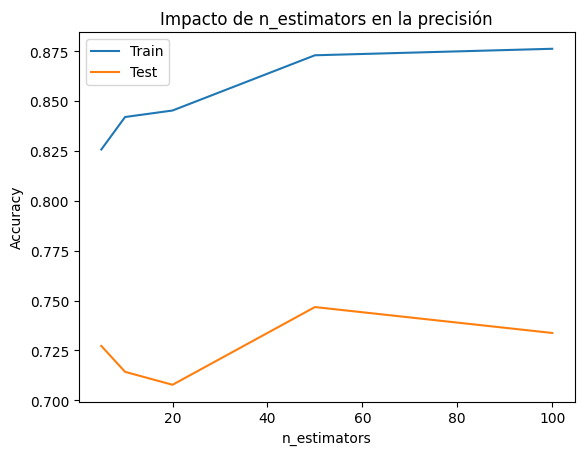

In [423]:


plt.figure()
plt.plot(df_results["n_estimators"], df_results["train_accuracy"], label="Train")
plt.plot(df_results["n_estimators"], df_results["test_accuracy"], label="Test")

plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.title("Impacto de n_estimators en la precisión")
plt.legend()
plt.show()


In [424]:
max_depth_list = [3, 5, 7, 10, 15]

In [425]:
resultados = []

for depth in max_depth_list:

    clf = CustomBoosting(
        n_estimators=10,
        learning_rate=0.01,
        max_depth=depth,
        min_samples_leaf=7,
        max_features=X_train_imp.shape[1] // 2,
        random_state=42
    )

    clf.fit(X_train_imp.values, y_train.values)

    y_pred_train = clf.predict(X_train_imp.values)
    y_pred_test = clf.predict(X_test_imp.values)

    resultados.append([
        depth,
        accuracy_score(y_train, y_pred_train),
        accuracy_score(y_test, y_pred_test)
    ])


In [426]:
df_results = pd.DataFrame(
    resultados,
    columns=[
        "depth",
        "train_accuracy",
        "test_accuracy",
    ]
)

df_results

,depth,train_accuracy,test_accuracy
0,3,0.773616,0.740260
1,5,0.802932,0.733766
2,7,0.842020,0.714286
3,10,0.855049,0.714286
4,15,0.851792,0.759740


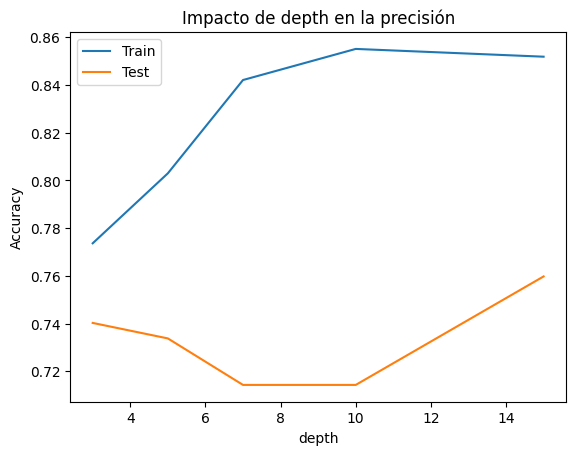

In [427]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(df_results["depth"], df_results["train_accuracy"], label="Train")
plt.plot(df_results["depth"], df_results["test_accuracy"], label="Test")

plt.xlabel("depth")
plt.ylabel("Accuracy")
plt.title("Impacto de depth en la precisión")
plt.legend()
plt.show()


// **19. Analiza y compara los resultados de los modelos? Haz un estudio ahora de los tres modelos utilizados, analiza sus predicciones, la clase con más precisión de predicción y la que menos. ¿Con cuál de los tres modelos te quedas?**

. Custom Boosting (mejor desempeño)

Test

Accuracy: 0.84 (la más alta)

F1: 0.79 (la más alta)

AUC: 0.84 (la más alta)

Recall: 0.849 (muy bueno)

Diferencias Train–Test ≈ 0.13

Hay overfitting claro, aunque no extremo.